In [1]:
# SDRuno_20200104_132713Z_445900kHz_20scenter.wav


# Analyze Received Long Single Tone Calibration WAV File
## By Terry Bondy, VA3TYB

In [2]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))
%plot --format svg
# format long

Last updated: Saturday  4 January 2020 UTC

In [3]:
inputFilename = "SDRuno_20200104_132713Z_445900kHz_20scenter.wav"

inputFilename = SDRuno_20200104_132713Z_445900kHz_20scenter.wav


In [4]:
audioinfo(inputFilename)

ans =

  scalar structure containing the fields:

    Filename = SDRuno_20200104_132713Z_445900kHz_20scenter.wav
    CompressionMethod = 
    NumChannels =  2
    SampleRate =  62500
    TotalSamples =  1250000
    Duration =  20
    BitsPerSample = -1
    BitRate = -1
    Title = 
    Artist = 
    Comment = 



In [5]:
[y, fs] = audioread(inputFilename);
size(y)
fs

ans =

   1250000         2

fs =  62500


In [6]:
z=y(:,1)+i*y(:,2);

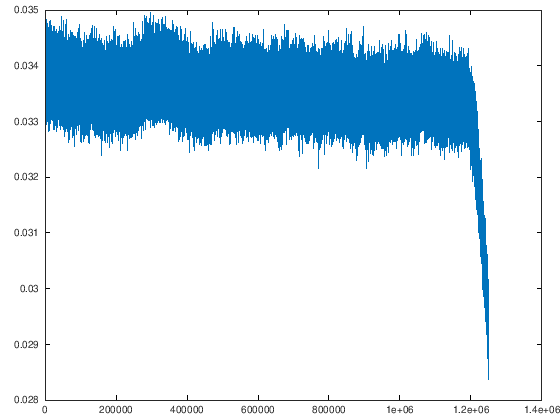

In [7]:
plot(abs(z));

In [8]:
size(z)

ans =

   1250000         1



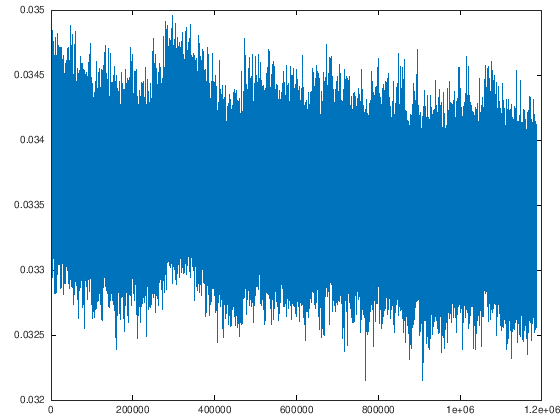

In [10]:
plot(abs(z(1:(end*19)/20)));

In [11]:
z = z(1:(end*19)/20);
size(z)

ans =

   1187500         1



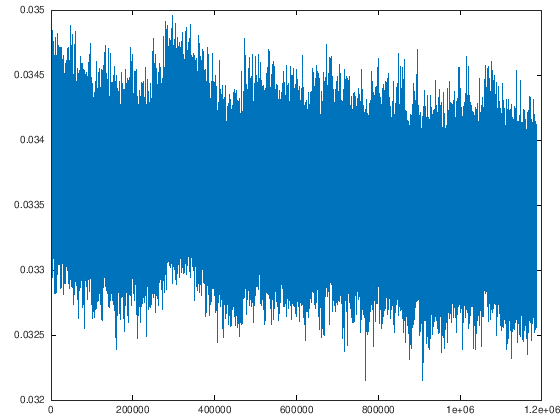

In [13]:
plot(abs(z));

In [17]:
sampleRate = fs;
numPeriods = rows(z)/sampleRate;
period = numPeriods;
Tshort = 0:1/sampleRate:1;
T = 0:1/sampleRate:period;

In [28]:
RC = (1 - cos(2*pi*Tshort))/2;

In [29]:
Sig = z(1:columns(RC))' .* RC;

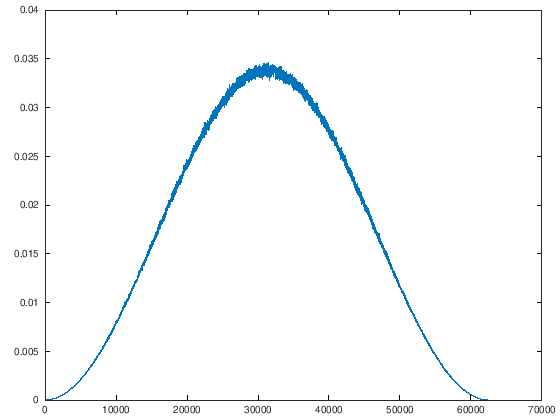

In [30]:
plot(abs(Sig));

In [44]:
E_cos_pulse = abs(fftshift(fft(Sig, sampleRate*10 + 1)));
F_base = linspace(-sampleRate/2, sampleRate/2, columns(E_cos_pulse));

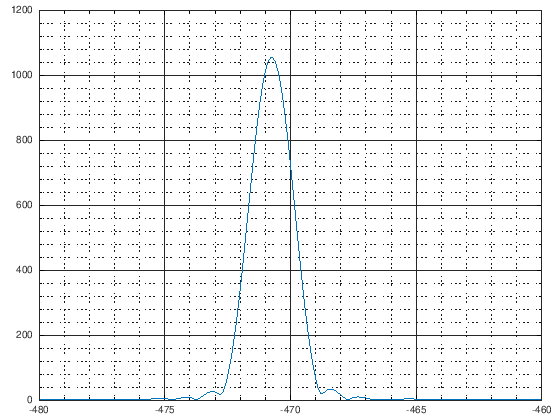

In [45]:
plot(F_base, E_cos_pulse)
grid on
grid minor
axis([-480 -460], "tic")

In [47]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse)))

ans = -470.70


In [52]:
size(z)

ans =

   1187500         1



In [56]:
fracSeconds = 4;
indexIncr = (columns(Tshort)-1)/fracSeconds;
Freqs = [];
for startIndex = 1:indexIncr:rows(z)-columns(RC)-1
  Sig = z(startIndex:startIndex+columns(RC)-1)' .* RC;
  E_cos_pulse = abs(fftshift(fft(Sig, sampleRate*10 + 1)));
  F_base = linspace(-sampleRate/2, sampleRate/2, columns(E_cos_pulse));
  freq = F_base(find(E_cos_pulse(:) == max(E_cos_pulse)))
  time = T(startIndex)
endfor

freq = -470.70
time = 0
freq = -470.70
time =  0.25000
freq = -470.60
time =  0.50000
freq = -470.60
time =  0.75000
freq = -470.50
time =  1
freq = -470.40
time =  1.2500
freq = -470.40
time =  1.5000
freq = -470.30
time =  1.7500
freq = -470.20
time =  2
freq = -470.10
time =  2.2500
freq = -470.10
time =  2.5000
freq = -470
time =  2.7500
freq = -470
time =  3
freq = -469.90
time =  3.2500
freq = -469.90
time =  3.5000
freq = -469.80
time =  3.7500
freq = -469.70
time =  4
freq = -469.70
time =  4.2500
freq = -469.60
time =  4.5000
freq = -469.50
time =  4.7500
freq = -469.50
time =  5
freq = -469.40
time =  5.2500
freq = -469.30
time =  5.5000
freq = -469.20
time =  5.7500
freq = -469.20
time =  6
freq = -469.10
time =  6.2500
freq = -469
time =  6.5000
freq = -469
time =  6.7500
freq = -468.90
time =  7
freq = -468.90
time =  7.2500
freq = -468.80
time =  7.5000
freq = -468.70
time =  7.7500
freq = -468.60
time =  8
freq = -468.50
time =  8.2500
freq = -468.50
time =  8.5000
freq 